#Final Code Copy - Tommy and James
- Note that the second code cell must be changed for your local machine

##Dataset
- Training Data obtained: https://www.kaggle.com/datasets/datamunge/sign-language-mnist?select=sign_mnist_train
- Testing Data obtained: https://www.kaggle.com/datasets/datamunge/sign-language-mnist?select=sign_mnist_test



In [1]:
# Import the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import time
import math

from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Read in the training data - JAMES DATA
train_file_input = '/content/drive/MyDrive/School/Machine Learning/Machine Learning Project/archive/sign_mnist_train.csv'
train_data = pd.read_csv(train_file_input)

# Read in the testing data
test_file_input = '/content/drive/MyDrive/School/Machine Learning/Machine Learning Project/archive/sign_mnist_test.csv'
test_data = pd.read_csv(test_file_input)

In [2]:
# TOMMY DATA
train_data = pd.read_csv('/content/drive/MyDrive/archive/sign_mnist_train/sign_mnist_train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/archive/sign_mnist_test/sign_mnist_test.csv')

In [3]:
# Split the training data into labels and features
train_X = train_data.iloc[:, 1:]
train_y = train_data.iloc[:, 0]

# Split the testing data into labels and features
test_X = test_data.iloc[:, 1:]
test_y = test_data.iloc[:, 0]

In [4]:
# Fit the data - fitting and scoring take around 13 seconds for each k, so around 2.4 minutes in total
k = 1

neigh = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
score = neigh.score(test_X, test_y)
print(f"The resulting score for k = {k} was {score}")

The resulting score for k = 1 was 0.8103736754043502


##Results from KNN
- The highest score was when n_neighbors = 1, at ~0.81

In [ ]:
# Fit and score SVM data - fitting and scoring took around 3.4 minutes
SVM = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel='rbf')).fit(train_X, train_y)
score = SVM.score(test_X, test_y)
print(f"The score is: {score}")

The score is: 0.848856664807585


##Results from SVM
- The highest score was kernel = 'rbf' at ~0.85

In [ ]:
# Fit and score a Naive Bayes Approach
nba = GaussianNB().fit(train_X, train_y)
score = nba.score(test_X, test_y)
print("Score of the naive bayes approach is:", score)

Score of the naive bayes approach is: 0.3898494143892917


##Results from Naive Bayes
- The highest score was ~0.39
- This was very poor will not be used again

##CNN Attempt


In [5]:
import tensorflow as tf
import pandas as pd

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read in the training data -- JAMES DATA
train_file_input = '/content/drive/MyDrive/School/Machine Learning/Machine Learning Project/archive/sign_mnist_train/sign_mnist_train.csv'
train_data = pd.read_csv(train_file_input)

# Read in the testing data
test_file_input = '/content/drive/MyDrive/School/Machine Learning/Machine Learning Project/archive/sign_mnist_test/sign_mnist_test.csv'
test_data = pd.read_csv(test_file_input)


In [7]:
# TOMMY DATA
train_data = pd.read_csv('/content/drive/MyDrive/archive/sign_mnist_train/sign_mnist_train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/archive/sign_mnist_test/sign_mnist_test.csv')

In [8]:
# Convert the images and labels to numpy arrays
train_images = train_data.iloc[:, 1:].to_numpy().reshape(27455, 28, 28)
train_labels = train_data.iloc[:, 0].to_numpy()

test_images = test_data.iloc[:, 1:].to_numpy().reshape(7172, 28, 28)
test_labels = test_data.iloc[:, 0].to_numpy()

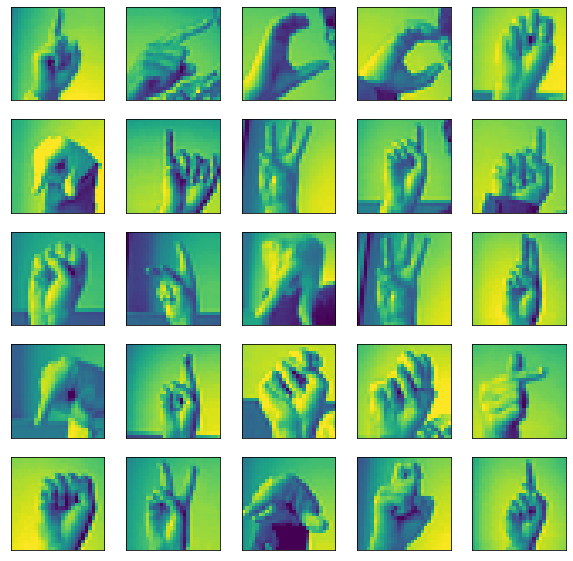

In [9]:
# Plot the first five images 

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28))
plt.show()

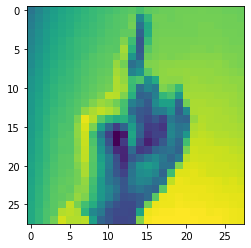

In [10]:
# Testing plotting one image
plt.imshow(train_images[0].reshape(28, 28))
plt.show()

In [11]:
# reshaping the images and normalizing them

train_images = train_images.reshape(27455, 28, 28, 1) / 255
test_images = test_images.reshape(7172, 28, 28, 1) / 255


In [12]:
# adding rotations ti the images

datagen = ImageDataGenerator(rotation_range=18, width_shift_range=0.12,  height_shift_range=0.12, zoom_range = 0.12)  
datagen.fit(train_images)

In [13]:
# we looked at ways to increase the variability of our learning rate, and we found this result online. It worked out that the values recorded worked best for our model

learning_rate = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [14]:
# Defining the layers of our model
# Online resources noted that a good framework to follow was -> CNN layer, Normalization or Dropout, MaxPool

model = models.Sequential()

model.add(layers.Conv2D(75, 3, padding = 'same' , activation = 'relu' , input_shape = (28,28, 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(2 , strides = 2 , padding = 'same'))

model.add(layers.Conv2D(50, 3, padding = 'same' , activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPool2D(2 , strides = 2 , padding = 'same'))

model.add(layers.Conv2D(25, 3, padding = 'same' , activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(2 , strides = 2 , padding = 'same'))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(26, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 75)        750       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 75)       300       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 75)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 14, 14, 50)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 50)         0

In [15]:
# Compiling the model with an optimizer and Cross Entropy Loss
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Fitting the model with 6 epochs
fitting = model.fit(train_images, train_labels, epochs=6, 
                    validation_data=(test_images, test_labels), callbacks = [learning_rate])

Epoch 1/6


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


858/858 [==============================] - 20s 11ms/step - loss: 0.3418 - accuracy: 0.8984 - val_loss: 0.2523 - val_accuracy: 0.9110 - lr: 0.0010
Epoch 2/6
858/858 [==============================] - 9s 10ms/step - loss: 0.0189 - accuracy: 0.9951 - val_loss: 0.2612 - val_accuracy: 0.9110 - lr: 0.0010
Epoch 3/6
858/858 [==============================] - 9s 10ms/step - loss: 0.0025 - accuracy: 0.9997 - val_loss: 0.1393 - val_accuracy: 0.9479 - lr: 0.0010
Epoch 4/6
858/858 [==============================] - 9s 11ms/step - loss: 0.0461 - accuracy: 0.9867 - val_loss: 0.1922 - val_accuracy: 0.9473 - lr: 0.0010
Epoch 5/6
854/858 [============================>.] - ETA: 0s - loss: 0.0031 - accuracy: 0.9991
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
858/858 [==============================] - 9s 10ms/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.3895 - val_accuracy: 0.9039 - lr: 0.0010
Epoch 6/6
858/858 [==============================] - 9s 11ms/step - loss:

In [16]:
# Test the accuracy of the model

test_acc = model.evaluate(test_images, test_labels)
print(test_acc[1])

225/225 [==============================] - 1s 5ms/step - loss: 0.1803 - accuracy: 0.9597
0.9597043991088867


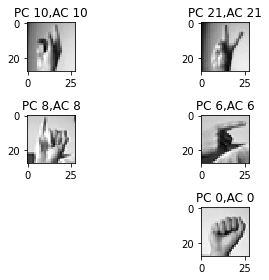

In [17]:
import numpy as np
predict_x=model.predict(test_images) 
predictions =np.argmax(predict_x,axis=1)

i = 0
for c in predictions[:6]:
    plt.subplot(3,2,i+1)
    plt.imshow(test_images[c].reshape(28,28), cmap="gray", interpolation='none')
    plt.title("PC {},AC {}".format(predictions[c], test_labels[c]))
    plt.tight_layout()
    i += 1

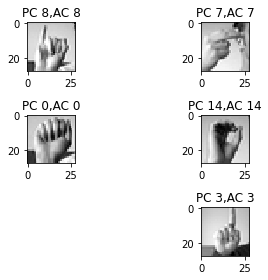

In [18]:
predict_x=model.predict(test_images) 
predictions =np.argmax(predict_x,axis=1)

i = 0
for c in predictions[6:12]:
    plt.subplot(3,2,i+1)
    plt.imshow(test_images[c].reshape(28,28), cmap="gray", interpolation='none')
    plt.title("PC {},AC {}".format(predictions[c], test_labels[c]))
    plt.tight_layout()
    i += 1

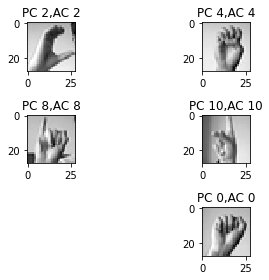

In [19]:
predict_x=model.predict(test_images) 
predictions =np.argmax(predict_x,axis=1)

i = 0
for c in predictions[75:81]:
    plt.subplot(3,2,i+1)
    plt.imshow(test_images[c].reshape(28,28), cmap="gray", interpolation='none')
    plt.title("PC {},AC {}".format(predictions[c], test_labels[c]))
    plt.tight_layout()
    i += 1